## Minería de Datos 2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

### 1.- AIrB&B 

**1.1**- Descargue los 4 csv del aula virtual (mismo lugar donde encontró este archivo). Este dataset corresponde a información sobre arriendos de la aplicación AirB&B en la pintoresca ciudad de Amsterdam, en Holanda. Los archivos estan separados en training y test, pero además se entrega la variable objetivo de la regresión en archivos separado llamados ``y_train.csv`` e ``y_test.csv`` respectivamente,

Las características (features) corresponden a:

| **Feature**   | **Descripción**                                       |
|---------------|-------------------------------------------------------|
| accommodates  | numero de pasajeros que caben en el alojamiento       |
| bathrooms     | cantifad de baños                                     |
| bedrooms      | cantidad de habitaciones |
| calculated_host_listings_count | cantidad de alojamientos disponibles calculado por la plataforma en la misma dirección |
| guests_included | cantidad de pasajeros incluidos en el precio por noche | 
| host_listings_count | cantidad de alojamientos disponibles declarados por el anunciante en la misma dirección |
| latitude | latitud |
| longitude | longitud |
| minimum_nights | cantidad mínima de noches |
| number_of_reviews | cantidad de comentarios realizados en la plataforma |
| d_centre | distancia al centro de la ciudad |
| instant_bookable_t | tiene reserva inmediata |
| instant_bookable_f | tiene reserva solo después de una confirmación |
| room_type_Entire home/apt | es un departamento/casa completa |
| room_type_Private room | es una pieza privada |
| room_type_Shared room | es una pieza compartida |

Además, los archivos ``y_train.csv`` e ``y_test.csv`` contienen el precio de arriendo para los dos conjuntos.

**1.2**- Cargue los 4 archivos en DataFrame pandas y muestre las estadísticas de las columnas tanto de los train como de los tests.

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
Y_train = pd.read_csv('y_train.csv')
Y_test = pd.read_csv('y_test.csv')

**1.2.1 Shapes**<br>
Mostramos la forma que tiene cada dataset cargado

In [3]:
train_df.shape

(10498, 16)

In [4]:
Y_train.shape

(10498, 1)

In [5]:
test_df.shape

(4500, 16)

In [6]:
Y_test.shape

(4500, 1)

Donde vemos que la cantidad de filas tanto para **Train** como para **Test** calza, y que los dataset ```y_train``` e ```y_test``` corresponden a 1 sola columna, que es nuestra variable objetivo.

**1.2.2 Heads**<br>
Vemos la estructura de nuestros dataset usando el comando```heads()```

In [7]:
train_df.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,4,2.0,2.0,1,1,1.0,52.358466,4.933843,2,8,3.279483,1,0,1,0,0
1,4,1.0,2.0,1,2,1.0,52.363589,4.983353,3,0,5.951843,1,0,1,0,0
2,2,1.0,1.0,1,1,1.0,52.375209,4.861647,3,8,2.601055,1,0,1,0,0
3,2,1.0,1.0,1,1,1.0,52.387382,4.890457,2,41,1.095138,1,0,0,1,0
4,2,1.0,1.0,1,1,1.0,52.384062,4.889877,3,0,0.844491,1,0,1,0,0


In [8]:
Y_train.head()

,price
0,160.0
1,120.0
2,99.0
3,100.0
4,175.0


In [9]:
test_df.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3,1.0,1.0,1,1,1.0,52.339005,4.944442,5,7,5.410324,1,0,1,0,0
1,2,1.0,1.0,1,1,1.0,52.374981,4.890104,3,9,0.786783,1,0,1,0,0
2,5,2.0,5.0,11,2,15.0,52.401826,4.914041,6,4,2.703668,1,0,1,0,0
3,4,1.0,2.0,1,1,1.0,52.350448,4.798421,2,0,7.561760,1,0,1,0,0
4,2,1.0,1.0,1,1,1.0,52.361044,4.943895,5,3,3.628639,1,0,1,0,0


In [10]:
Y_test.head()

,price
0,59.0
1,148.0
2,134.0
3,195.0
4,80.0


**1.2.3 Valores Nulos**<br>
Buscamos por algun valor nulo que podria haber en nuestro conjunto de datos

In [11]:
train_df.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [12]:
Y_train.isnull().sum()

price    0
dtype: int64

In [13]:
test_df.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [14]:
Y_test.isnull().sum()

price    0
dtype: int64

Donde queda claro que los datos ya vienen pre procesados y no hay ninguna muestra que presente valores nulos.

**1.2.4 Describe**<br>
Mostramos las estadisticas de nuestros datos, tanto para **Train** como para **Test**

In [15]:
train_df.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000
mean,2.893694,1.120213,1.387598,2.891122,1.505239,3.349400,52.365324,4.889084,2.912936,17.707944,3.001106,0.844542,0.155458,0.777005,0.219280,0.003715
std,1.326817,0.360843,0.845380,8.853806,0.955633,11.157171,0.015832,0.035094,7.995548,34.717291,1.620033,0.362358,0.362358,0.416275,0.413778,0.060840
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.355621,4.865018,2.000000,2.000000,1.949055,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.364995,4.886252,2.000000,7.000000,2.836803,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,52.374899,4.908030,3.000000,18.000000,3.577086,1.000000,0.000000,1.000000,0.000000,0.000000
max,17.000000,8.000000,10.000000,91.000000,16.000000,106.000000,52.426224,5.026701,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Y_train.describe()

,price
count,10498.000000
mean,129.733283
std,63.757064
min,19.000000
25%,89.000000
50%,115.000000
75%,150.000000
max,440.000000


In [17]:
test_df.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2.849111,1.106889,1.398667,2.936222,1.485556,3.425778,52.365285,4.888913,2.820000,18.006222,2.992695,0.842889,0.157111,0.777556,0.216889,0.005556
std,1.229459,0.298766,0.826166,8.795454,0.904664,11.312217,0.015609,0.034817,5.114519,34.884376,1.589873,0.363946,0.363946,0.415934,0.412172,0.074337
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,52.290687,4.774976,1.000000,0.000000,0.212781,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.355510,4.864308,2.000000,2.000000,1.948888,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.364907,4.886638,2.000000,7.000000,2.853090,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,52.374549,4.907757,3.000000,18.000000,3.576940,1.000000,0.000000,1.000000,0.000000,0.000000
max,16.000000,4.000000,10.000000,91.000000,16.000000,106.000000,52.424980,5.027689,180.000000,408.000000,11.592780,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
Y_test.describe()

,price
count,4500.000000
mean,130.789778
std,63.968657
min,23.000000
25%,89.000000
50%,117.000000
75%,150.000000
max,433.000000


**PREGUNTA**: Complete la tabla del punto 1.1. agregando el tipo de dato (i.e., real, entero, binario, categorico, etc.)

In [19]:
train_df.dtypes

accommodates                        int64
bathrooms                         float64
bedrooms                          float64
calculated_host_listings_count      int64
guests_included                     int64
host_listings_count               float64
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
d_centre                          float64
instant_bookable_f                  int64
instant_bookable_t                  int64
room_type_Entire home/apt           int64
room_type_Private room              int64
room_type_Shared room               int64
dtype: object

| **Feature**   | **Descripción**                                       | **Type** |
|---------------|-------------------------------------------------------|----------|
| accommodates  | numero de pasajeros que caben en el alojamiento       | Entero |
| bathrooms     | cantidad de baños                                     | Entero (Real)|
| bedrooms      | cantidad de habitaciones | Entero (Real) |
| calculated_host_listings_count | cantidad de alojamientos disponibles calculado por la plataforma en la misma dirección | Entero |
| guests_included | cantidad de pasajeros incluidos en el precio por noche | Entero |
| host_listings_count | cantidad de alojamientos disponibles declarados por el anunciante en la misma dirección | Entero (Real) |
| latitude | latitud | Real |
| longitude | longitud | Real |
| minimum_nights | cantidad mínima de noches | Entero |
| number_of_reviews | cantidad de comentarios realizados en la plataforma | Entero |
| d_centre | distancia al centro de la ciudad | Real |
| instant_bookable_t | tiene reserva inmediata | Booleano (Entero) (Categorico) |
| instant_bookable_f | tiene reserva solo después de una confirmación | Booleano (Entero) (Categorico) |
| room_type_Entire home/apt | es un departamento/casa completa | Booleano (Entero) (Categorico) |
| room_type_Private room | es una pieza privada | Booleano (Entero) (Categorico) |
| room_type_Shared room | es una pieza compartida | Booleano (Entero) (Categorico) |

Donde, se repondio lo que deberia ser el tipo de datos, y en parentesis aparece el tipo de dato que reporta el comando ```.dtypes``` de Pandas.<br>
Ademas se adjunta un segundo parentesis a aquellos que se considera Categoricos

**1.3**- Muestre la matriz de correlación (con heatmap) incluyendo el precio de arriendo tanto para el training como para el test.

In [4]:
# Agregamos las columnas de precio de arriendo a nuestros dataset
train_df['price'] = Y_train
test_df['price'] = Y_test

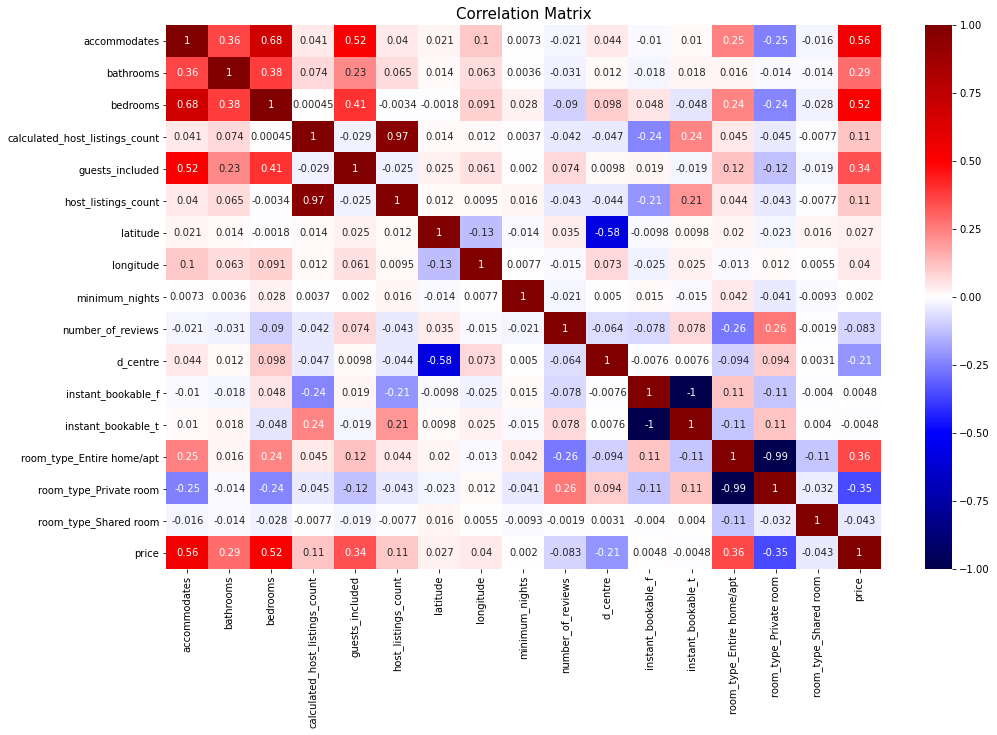

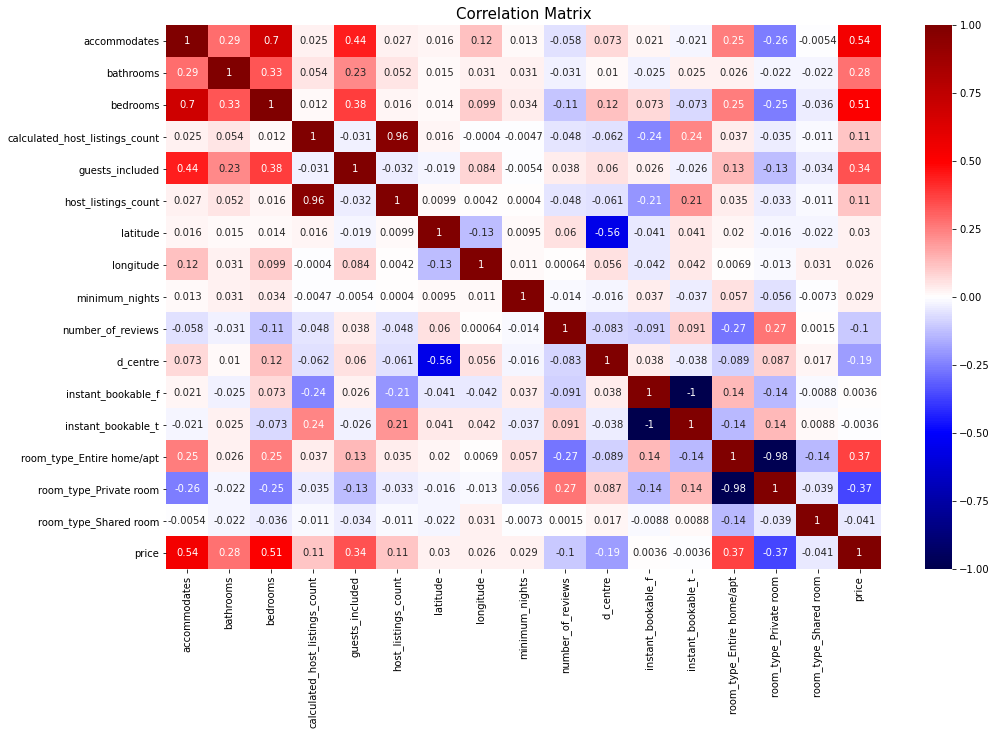

In [5]:
def plot_corr_matrix(data, features=None, annot=True, size=(16,10)):
    '''
    Funtion that allows us to plot the correlation matrix of our dataset
    
    Parameters
    ----------
    data : Pandas DataFrame
        The dataframe we want to calculate the correlation matrix of
    features : list, optional
        The features we want to calculate the correlation matrix of.
        Must be a subset of all the features of the DataFrame.
        Default is None, meaning we calculate the correlation of every feature of the DataFrame
    annot : Boolean, optional
        Defines wether the matrix will show the value of the correlation, or just the color
        True will yield the values in each cell
        False will only display the color
        Default is True
    size : (float, float), Optional
        Size of the final figure
        Default is (16,10)

    Returns
    -------
    None
        It doesnt return anything, but it does display de correlation matrix using MatPlotLib
    '''
    # MatPlotLib setup
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)
    
    # Select features to correlate
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
        
    # Use Seaborn to plot 
    ax = sns.heatmap(corr, annot=annot,
                    xticklabels=corr.columns,
                    yticklabels=corr.columns,
                    cmap="seismic",
                    vmin=-1, vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    
plot_corr_matrix(train_df, annot=True)
plot_corr_matrix(test_df, annot=True)

**PREGUNTA**: ¿Qué puede decir de los dos conjuntos? ¿Representan un espacio de datos similar?

A partir de los heatmaps, podemos deducir que ambos conjuntos de datos presentan una correlacion similar en todas sus variables, lo que nos indica que representan un espacio de datos similar

### 2- Regresión Lineal con Modelo Lineal en 1D

**2.1** Indique las 5 características que tengan la mayor correlación (o anti-correlación, i.e., valores negativos) con respecto al precio de arriendo en el conjunto de entrenamiento. Realice un pairplot con estas variables.

**2.1.1** Seleccionamos las 5 caracteristicas con mayor correlacion

In [10]:
# Calculate correlation matrix
corr = train_df.corr()
# Absolute value to compare negative and positive correlation
corr['price'] = abs(corr['price'])
# Sort by corellated value
corr = corr.sort_values(by=['price'], ascending=False)
# Select the first 5 variables (se omite la 0 ya que es la misma precio (valor 1))
correlated_variables = corr.index[1:6]
correlated_variables

Index(['accommodates', 'bedrooms', 'room_type_Entire home/apt',
       'room_type_Private room', 'guests_included'],
      dtype='object')

**2.1.2** Realizamos el Pairplot

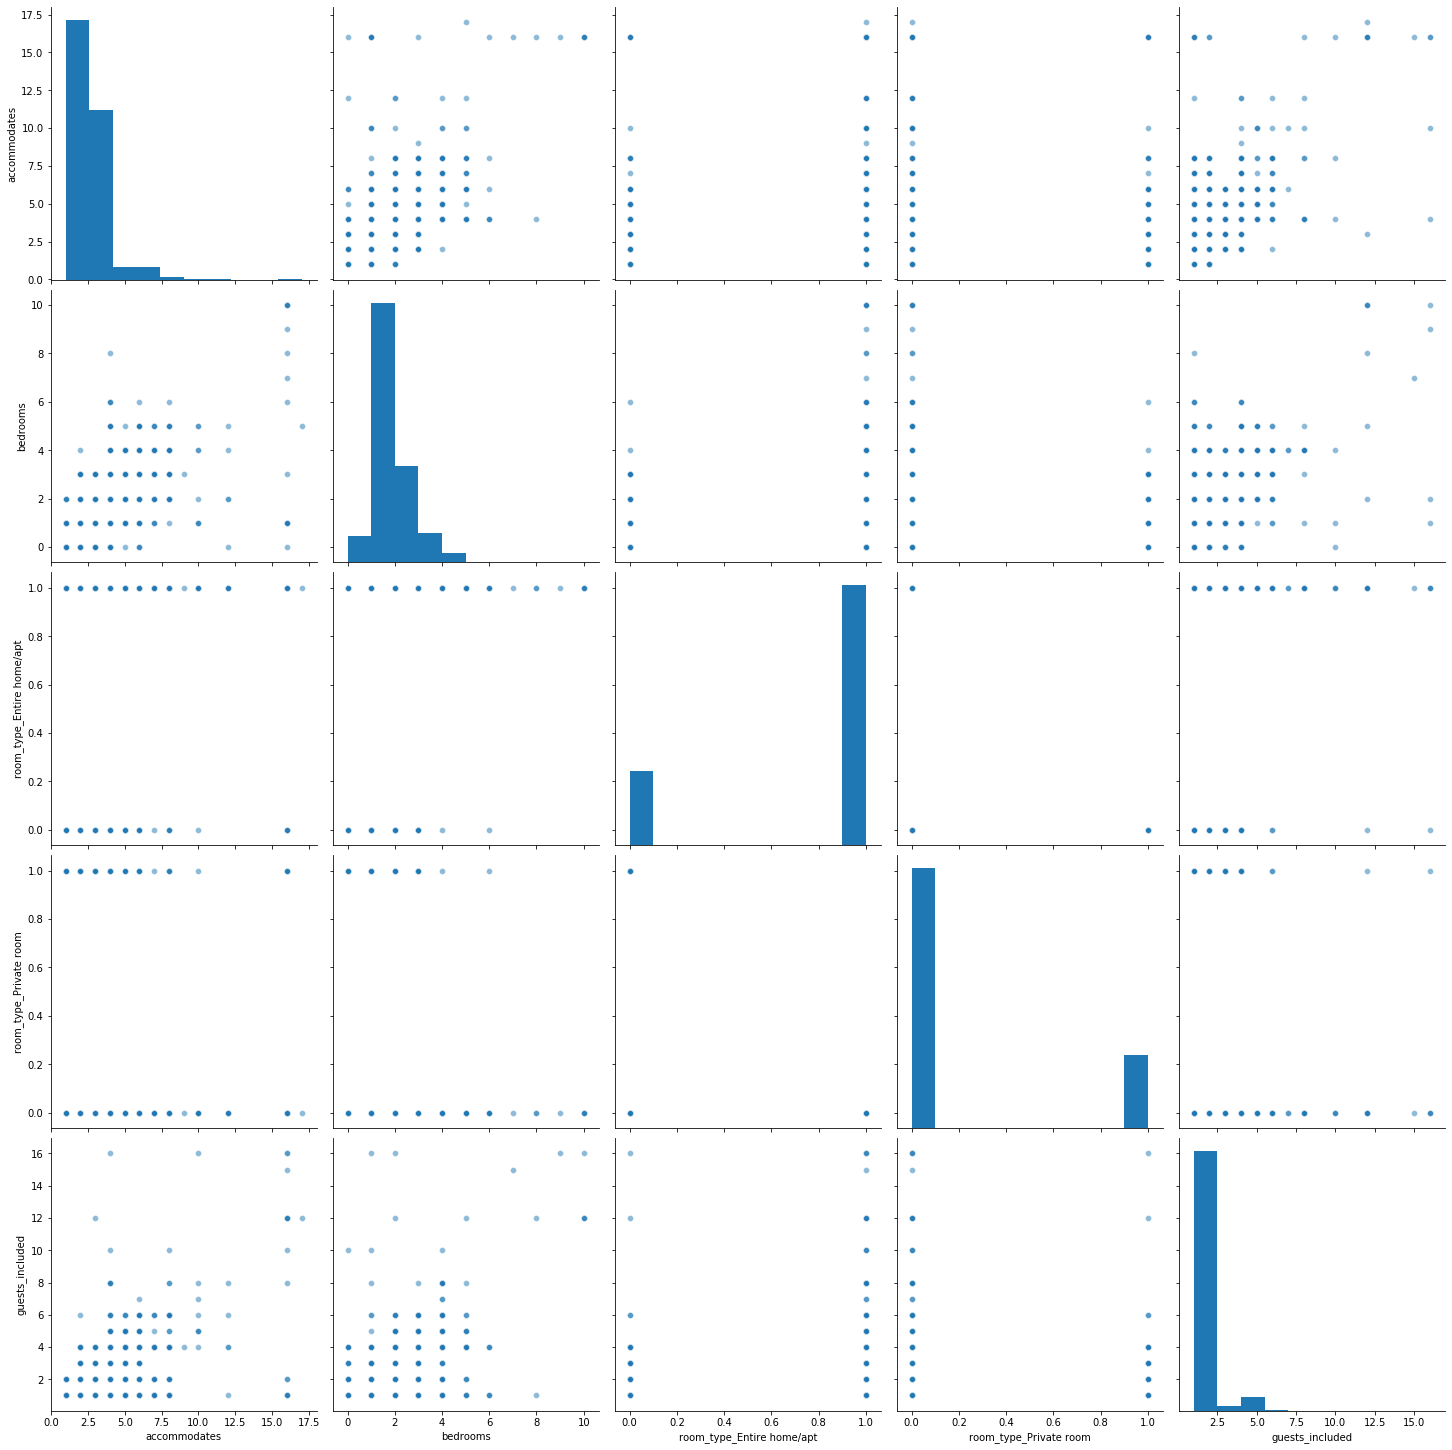

In [23]:
sns.pairplot(train_df[correlated_variables], height=4, plot_kws={'alpha': 0.5})

**PREGUNTA**: ¿Cuál es la dificultad de trabajar con estas características?

Corresponden todas a variables de tipo entero o booleanas (todas son discretas).<br>
Esto puede dificultarnos al momento de hacer una regresion lineal

**2.2** Haga un diagrama de dispersión con las variables geográficas (latitud y longitud), incluyendo el precio como variable de color (en su colormap preferido) de los datos de entrenamiento. Agregue una imagen de Amsterdam para ver si coincide su topología.

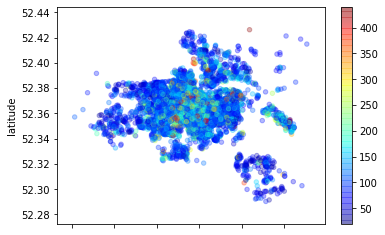

In [24]:
train_df.plot.scatter(x='longitude', y='latitude', c=train_df['price'], cmap='jet', alpha=0.3)

Donde se ve que los datos en azul actualmente opacan al resto de nuestros datos.<br>
Para poder apreciar mejor aquellos puntos donde se encuentra un precio mas alto en el mapa, cambiamos nuestro mapa de color por ```binary```.

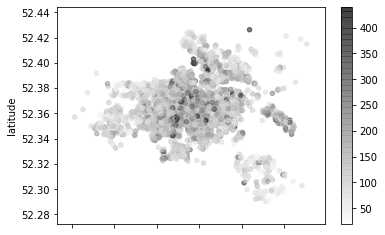

In [25]:
train_df.plot.scatter(x='longitude', y='latitude', c=train_df['price'], cmap='binary', alpha=0.5)

![amsterdam](amsterdam.png)

**PREGUNTA**: ¿Puede identificar un patrón en los colores de esta imágen?

A partir del ultimo mapa (el que utiliza ```binary```), se puede apreciar que aquellos AirB&B que presentan un precio mas alto por lo general se mas cercanos al centro de la ciudad que aquellos con un menor precio.<br>
En contraste, aquellos que se encuentran mas alejados del centro de la ciudad, por lo general presentan un menor precio que el resto.

**2.3** Considerando el punto anterior, ahora tomaremos la variable ``d_centre`` como nuestro X y el ``price``como nuetro Y. Realice una regresión Ridge y una KernelRidge con kernel RBF para los datos de entrenamiento y parámetros por defecto. Realice un diagrama de dispersión de estas dos variables, y grafique ambas curvas de regresión en distintos colores. Calcule además el error cuadrático medio (Mean Squared Error) de entrenamiento y de testing para cada uno de los dos modelos (i.e., Ridge y KernelRidge).

In [11]:
X_train = train_df.values
X_test = test_df.values
X_train

array([[  4.,   2.,   2., ...,   0.,   0., 160.],
       [  4.,   1.,   2., ...,   0.,   0., 120.],
       [  2.,   1.,   1., ...,   0.,   0.,  99.],
       ...,
       [  2.,   1.,   1., ...,   1.,   0.,  79.],
       [  4.,   1.,   3., ...,   0.,   0., 150.],
       [  3.,   1.,   2., ...,   0.,   0.,  99.]])

**2.3.1** Seleccionamos nuestros datos de interes (```d_centre```)

In [27]:
X = train_df[['d_centre']]

**2.3.2** Aplicamos regresion Ridge y KernelRidge a los datos de entrenamiento

<Figure size 432x288 with 0 Axes>

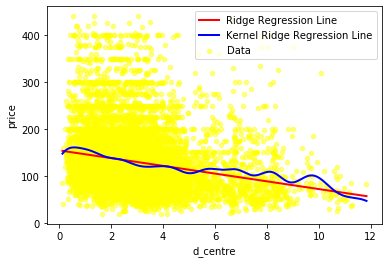

<Figure size 432x288 with 0 Axes>

In [28]:
xvals = np.linspace(X.min(), X.max(), 10498)

# Regresion con Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, Y_train)
Ridge_Y_prediction = ridge_regressor.predict(xvals)

# Regresion con KernelRidge
K_ridge_regressor = KernelRidge(kernel='rbf')
K_ridge_regressor.fit(X, Y_train)
KRidge_Y_prediction = K_ridge_regressor.predict(xvals)

fig, ax = plt.subplots()
train_df.plot.scatter(x='d_centre', y='price', color='yellow', label='Data', alpha=0.5, ax=ax)
ax.plot(xvals, Ridge_Y_prediction, color='red', linewidth=2.0, label='Ridge Regression Line')
ax.plot(xvals, KRidge_Y_prediction, color='blue', linewidth=2.0, label='Kernel Ridge Regression Line')
plt.legend()
plt.figure()

**2.3.3** Calculo de error para datos de entrenamiento

In [29]:
mean_squared_error(Y_train, Ridge_Y_prediction)

5435.087442309193

In [30]:
mean_squared_error(Y_train, KRidge_Y_prediction)

5192.356855339537

**2.3.4** Calculo de error para datos de test

In [31]:
X = test_df[['d_centre']]
xvals = np.linspace(X.min(), X.max(), 4500)

# Regresion con Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, Y_test)
Ridge_Y_prediction = ridge_regressor.predict(xvals)

# Regresion con KernelRidge
K_ridge_regressor = KernelRidge(kernel='rbf')
K_ridge_regressor.fit(X, Y_test)
KRidge_Y_prediction = K_ridge_regressor.predict(xvals)

In [32]:
mean_squared_error(Y_test, Ridge_Y_prediction)

5281.060694803723

In [33]:
mean_squared_error(Y_test, KRidge_Y_prediction)

4866.795821244054

**PREGUNTA**: ¿Cuál es un mejor modelo para estos datos y por qué?

Al calcular los errores para ambos conjuntos de datos, podemos apreciar que el modelo utilizando KernelRidge es mejor ya que tiene un menor **Mean Squared Error**, o Error Cuadrado Medio, con el cual medimos el cuadrado de la distancia de los elementos a nuestra regresion.

### 3- Regresión en ND
**3.1** Vuelva a utilizar todo el dataset, estandarice el set de entramiento y ocupe la misma transformación para el testing. Deje sus datos estandarizados en dataframes pandas y haga un describe() del conjunto de entrenamiento.
Realice la regresión para el precio de arriendo, y reporte los errores cuadráticos medios al igual que en la pregunta 2.3.

In [34]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
Y_train = pd.read_csv('y_train.csv')
Y_test = pd.read_csv('y_test.csv')

Donde ya sabemos que nuestros datos vienen sin valores nulos, como se vio en el punto 1.

**3.1.1** Estandarizamos los datos

In [35]:
X_train = train_df.values
X_test = test_df.values

std_scaler = StandardScaler()
std_scaler.fit(X_train)
# Se hace el fit solamente con el conjunto de train para mantener la transformacion para el conjunto de testing

# Se estandarizan los datos
std_train = std_scaler.transform(X_train)
std_test = std_scaler.transform(X_test)

# Se pasan los datos estandarizados a un Dataframe Pandas
std_train_df = pd.DataFrame(std_train, columns=train_df.columns)
std_test_df = pd.DataFrame(std_test, columns=test_df.columns)

**3.1.2** Describe para el conjunto de entrenamiento

In [36]:
std_train_df.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04
mean,-9.475708e-18,7.597487e-17,5.651583e-17,-2.030509e-18,-1.475503e-16,2.030509e-18,-6.750697e-14,-2.432685e-14,1.421356e-17,-8.460454e-18,4.737854e-18,-1.556723e-17,-3.113447e-17,-6.903730e-17,-8.798872e-17,2.707345e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.427314e+00,-3.104581e+00,-1.641467e+00,-2.136044e-01,-5.287212e-01,-3.002158e-01,-4.738411e+00,-3.863278e+00,-2.392615e-01,-5.100855e-01,-1.781100e+00,-2.330793e+00,-4.290384e-01,-1.866657e+00,-5.299705e-01,-6.106428e-02
25%,-6.735947e-01,-3.331617e-01,-4.585110e-01,-2.136044e-01,-5.287212e-01,-2.105831e-01,-6.128781e-01,-6.858064e-01,-1.141860e-01,-4.524746e-01,-6.494318e-01,4.290384e-01,-4.290384e-01,5.357171e-01,-5.299705e-01,-6.106428e-02
50%,-6.735947e-01,-3.331617e-01,-4.585110e-01,-2.136044e-01,-5.287212e-01,-2.105831e-01,-2.076772e-02,-8.072677e-02,-1.141860e-01,-3.084473e-01,-1.014239e-01,4.290384e-01,-4.290384e-01,5.357171e-01,-5.299705e-01,-6.106428e-02
75%,8.338445e-01,-3.331617e-01,7.244452e-01,-2.136044e-01,5.177560e-01,-2.105831e-01,6.048425e-01,5.398723e-01,1.088960e-02,8.412797e-03,3.555532e-01,4.290384e-01,-4.290384e-01,5.357171e-01,-5.299705e-01,-6.106428e-02
max,1.063220e+01,1.906678e+01,1.018809e+01,9.952000e+00,1.516844e+01,9.200853e+00,3.846765e+00,3.921552e+00,6.505018e+01,1.377742e+01,5.457590e+00,4.290384e-01,2.330793e+00,5.357171e-01,1.886898e+00,1.637619e+01


**3.1.3** Regresion para el precio de arriendo (```Train```)

In [37]:
X_train = std_train_df.values
Y_train = Y_train.values

# Regresion con Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, Y_train)
Ridge_Y_prediction = ridge_regressor.predict(X_train)

# Regresion con KernelRidge
K_ridge_regressor = KernelRidge(kernel='rbf')
K_ridge_regressor.fit(X_train, Y_train)
KRidge_Y_prediction = K_ridge_regressor.predict(X_train)

**3.1.4** Errores Cuadraticos Medios (```Train```)

In [38]:
mean_squared_error(Y_train, Ridge_Y_prediction)

2115.4848172790425

In [39]:
mean_squared_error(Y_train, KRidge_Y_prediction)

1632.0120085466615

**3.1.5** Regresion para el precio de arriendo (```Test```)

In [40]:
X_test = std_test_df.values
Y_test = Y_test.values

# Regresion con Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X_test, Y_test)
Ridge_Y_prediction = ridge_regressor.predict(X_test)

# Regresion con KernelRidge
K_ridge_regressor = KernelRidge(kernel='rbf')
K_ridge_regressor.fit(X_test, Y_test)
KRidge_Y_prediction = K_ridge_regressor.predict(X_test)

**3.1.6** Errores Cuadraticos Medios (```Test```)

In [41]:
mean_squared_error(Y_test, Ridge_Y_prediction)

2164.1073706449433

In [42]:
mean_squared_error(Y_test, KRidge_Y_prediction)

1664.9069576739844

**PREGUNTA**: ¿Qué conclusiones puede usted sacar en comparación con la pregunta 2.3?

Con respecto a la pregunta 2.3, podemos ver que los errores disminuyeron bastante, lo que podria atribuirse a 2 posibles factores:
- La estandarizacion de los datos (en el punto 2.3 no se pide)
- El aplicar la regresion en N dimensiones

O una combinacion de los 2.<br>
Ademas, al igual que en la pregunta 2.3, podemos ver nuevamente que el model KernelRidge se ajusta mejor a los datos, a pesar de que ahora estemos trabajando con mas dimensiones.<br>

**3.2** Realice un PCA a los datos de entrenamiento con una cantidad de componentes que expliquen al menos el 80% de la varianza (muestre el gráfico de varianza explicada). Aplique la misma transformación a los datos de testing. Ejecute otra vez las regresiones Ridge y KernelRidge y calcule nuevamente los errores cuadráticos medios. 

**3.2.1** PCA (```Train```)

Varianza Acumulada:  [0.17221749 0.32473433 0.44311036 0.54259681 0.63263902 0.69606413
 0.75825631 0.81765832]


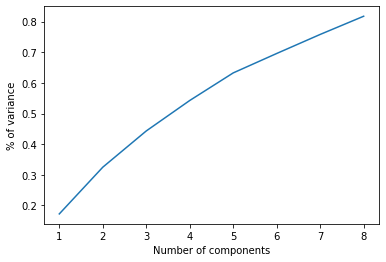

In [43]:
# Utilizamos nuestro DataFrame ya estandarizado
X_train = std_train_df.values

n = 8
pca = decomposition.PCA(n_components = n)
pca.fit(X_train)        # Se aplica el fit solamente al conjunto de entrenamiento para mantener la transformacion

# Se aplica PCA
train_pca = pca.transform(X_train)
train_variance = pca.explained_variance_ratio_

# Imprimimos la varianza
print('Varianza Acumulada: ', train_variance.cumsum())
plt.plot(np.arange(1, n+1), train_variance.cumsum())
plt.xlabel("Number of components")
plt.ylabel("% of variance")
plt.show()

Donde vemos que con 8 componentes mantenemos un 81% de la informacion

**3.2.2** PCA (```Test```)

In [44]:
X_test = std_test_df.values

test_pca = pca.transform(X_test)       # No aplicamos el fit para mantener la transformacion que hicimos en training

**3.2.3** Regresion con PCA (```Train```)

In [45]:
X_train = train_pca
Y_train = Y_train

# Regresion con Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, Y_train)
Ridge_Y_prediction = ridge_regressor.predict(X_train)

# Regresion con KernelRidge
K_ridge_regressor = KernelRidge(kernel='rbf')
K_ridge_regressor.fit(X_train, Y_train)
KRidge_Y_prediction = K_ridge_regressor.predict(X_train)

**3.2.5.** Calculo de Error con PCA (```Train```)

In [46]:
mean_squared_error(Y_train, Ridge_Y_prediction)

2398.0846353677275

In [47]:
mean_squared_error(Y_train, KRidge_Y_prediction)

1834.9915509443356

**3.2.6** Calculo de Error con PCA (```Test```)

In [48]:
X_test = test_pca
Y_test = Y_test

# Regresion con Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X_test, Y_test)
Ridge_Y_prediction = ridge_regressor.predict(X_test)

# Regresion con KernelRidge
K_ridge_regressor = KernelRidge(kernel='rbf')
K_ridge_regressor.fit(X_test, Y_test)
KRidge_Y_prediction = K_ridge_regressor.predict(X_test)

**3.2.7** Calculo de Error con PCA (```Test```)

In [49]:
mean_squared_error(Y_test, Ridge_Y_prediction)

2412.715762233956

In [50]:
mean_squared_error(Y_test, KRidge_Y_prediction)

1899.7244543558872

**Pregunta**: ¿Fué exitosa la aplicación de PCA? Fundamente su respuesta razonando sobre la función de PCA, y no solo comentando los resultados.

La aplicacion de PCA antes de realizar la regresion no es efectiva.<br>
Esto se debe a la naturaleza de PCA, donde tenemos 2 factores que hacen que incremente el error al aplicarse PCA antes de realizar la regresion:
1. Al utilizar PCA estamos reduciendo la dimensionalidad, pero perdiendo informacion (en este caso, perdimos aproximadamente un 20% de los datos). Esto significa que nuestra habilidad de predecir el modelo va a disminuir (o va a aumentar el error) al tener menos informacion con la cual hacer nuestra regresion.
2. PCA crea componentes que explican la mayor cantidad de varianza, pero estos no tienen porque tener relacion alguna con nuestra variable objetivo, lo que hace que nuestro componente principal probablemente no sea un buen predictor de los datos.

Asi, si bien logramos reducir el costo computacional del calculo de la regresion (ya que reducimos la dimensionalidad), lo estamos haciendo a cambio de perder exactitud en nuestra regresion, lo que se puede evidenciar al mirar los errores con y sin PCA.

**3.3** Como usted conoce ya la API de scikit-learn, y esta es la misma para todos los regresores (i.e., de hecho lo es para todos los estimadores) realice una regresión con otra técnica (que no sea Lasso y Regresión Lineal Simple) y reporte sus errores cuadráticos medios de training y testing

Para este punto, se utilizan las tecnicas:
- Elastic Net
- KNeighborsRegressor

Las cuales se eligieron utlizando el siguiente recurso:
https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5

**3.3.1** Elastic Net (```Train```)

In [51]:
X_train = std_train_df.values
Y_train = Y_train

# Regression con ElasticNet
Elastic_Net_regressor = ElasticNet()
Elastic_Net_regressor.fit(X_train, Y_train)
Elastic_Y_prediction = Elastic_Net_regressor.predict(X_train)

In [52]:
mean_squared_error(Y_train, Elastic_Y_prediction)

2263.7795500092793

**3.3.2** Elastic Net (```Test```)

In [53]:
X_test = std_test_df.values
Y_test = Y_test

# Regression con ElasticNet
Elastic_Net_regressor = ElasticNet()
Elastic_Net_regressor.fit(X_test, Y_test)
Elastic_Y_prediction = Elastic_Net_regressor.predict(X_test)

In [54]:
mean_squared_error(Y_test, Elastic_Y_prediction)

2321.434030206466

**3.3.3** KNeighbors (```Train```)

In [55]:
X_train = std_train_df.values
Y_train = Y_train

# Regresion con KNeighbors
K_Neighbors_regressor = KNeighborsRegressor()
K_Neighbors_regressor.fit(X_train, Y_train)
KNeighbors_Y_prediction = K_Neighbors_regressor.predict(X_train)

In [56]:
mean_squared_error(Y_train, KNeighbors_Y_prediction)

1387.5122156601258

**3.3.4** KNeighbors (```Test```)

In [57]:
X_test = std_test_df.values
Y_test = Y_test

# Regresion con KNeighbors
K_Neighbors_regressor = KNeighborsRegressor()
K_Neighbors_regressor.fit(X_test, Y_test)
KNeighbors_Y_prediction = K_Neighbors_regressor.predict(X_test)

In [58]:
mean_squared_error(Y_test, KNeighbors_Y_prediction)

1441.874177777778

**PREGUNTA FINAL**: Compare el resultado de la técnica que usted eligió con Kernel Ridge. 

Ya que los datos que se utilizaron en el ultimo punto no fueron los con PCA, se compararan los resultados de las tecnicas utilizadas con los resultados de Kernel Ridge antes de aplicarse PCA.

Para el caso de Kernel Ridge, obtuvimos:<br>
- Error Train: 1632.0120085466615
- Error Test: 1664.9069576739844

Los que, al comprar con ElasticNet, podemos ver que es mejor Kernel Ridge.
Sin embargo, al comprar con Kneighbors, vemos que este ultimo tiene un menor error, lo que nos lleva a pensar que es un mejor modelo.